In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
dataset =pd.read_csv('/kaggle/input/cicids2017/dataset.csv')
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042552,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1042553,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1042554,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1042555,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042557 entries, 0 to 1042556
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1042557 non-null  int64  
 1    Flow Duration                1042557 non-null  int64  
 2    Total Fwd Packets            1042557 non-null  int64  
 3    Total Backward Packets       1042557 non-null  int64  
 4   Total Length of Fwd Packets   1042557 non-null  int64  
 5    Total Length of Bwd Packets  1042557 non-null  int64  
 6    Fwd Packet Length Max        1042557 non-null  int64  
 7    Fwd Packet Length Min        1042557 non-null  int64  
 8    Fwd Packet Length Mean       1042557 non-null  float64
 9    Fwd Packet Length Std        1042557 non-null  float64
 10  Bwd Packet Length Max         1042557 non-null  int64  
 11   Bwd Packet Length Min        1042557 non-null  int64  
 12   Bwd Packet Length Mean     

In [4]:
df = dataset

In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
df[' Label'].value_counts()

 Label
BENIGN      629074
DoS         194642
DDoS        128022
PortScan     90819
Name: count, dtype: int64

In [7]:
df = df.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

In [8]:
df.isnull().sum().sum()

0

In [9]:
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [10]:
df = df.replace([np.inf, -np.inf], np.nan)

In [11]:
df.isnull().sum().sum()

1316

In [12]:
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [13]:
df[' Label'].value_counts()

 Label
BENIGN      628546
DoS         194639
DDoS        128020
PortScan     90694
Name: count, dtype: int64

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 70].values

In [15]:
Down_Dic = {'BENIGN': 628546,
            'DoS': 194639,
            'PortScan': 90694,
            'DDoS': 128020,
            }

DownSamp = RandomUnderSampler(sampling_strategy=Down_Dic, random_state=0)
X,y=DownSamp.fit_resample(X,y)

In [16]:
UP_Dic = {'BENIGN': 628546,
            'DoS': 194639,
            'PortScan': 90694,
            'DDoS': 128020,
            }

UpSamp = SMOTE(sampling_strategy=UP_Dic, random_state=0)
X,y=UpSamp.fit_resample(X,y)

In [17]:
y = pd.get_dummies(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
classifier = Sequential()

classifier.add(Dense(42, activation = 'relu', input_dim = 70))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
classifier.add(Dense(42, activation = 'relu'))

In [23]:
classifier.add(Dense(4, activation = 'softmax'))

In [24]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = classifier.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=128)

Epoch 1/25


I0000 00:00:1732542198.685707      68 service.cc:145] XLA service 0x78ed2000b520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732542198.685756      68 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732542198.685760      68 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 111/4559 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6072 - loss: 0.9340

I0000 00:00:1732542200.501180      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4559/4559 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9501 - loss: 0.1349 - val_accuracy: 0.9902 - val_loss: 0.0271
Epoch 2/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9911 - loss: 0.0246 - val_accuracy: 0.9918 - val_loss: 0.0227
Epoch 3/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9934 - loss: 0.0177 - val_accuracy: 0.9937 - val_loss: 0.0168
Epoch 4/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9942 - loss: 0.0161 - val_accuracy: 0.9945 - val_loss: 0.0144
Epoch 5/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9946 - loss: 0.0142 - val_accuracy: 0.9950 - val_loss: 0.0141
Epoch 6/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9949 - loss: 0.0135 - val_accuracy: 0.9947 - val_loss: 0.0144
Epoch 7/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9953 - loss: 0.0128 - val_accuracy: 0.9953 - val_loss: 0.0125
Epoch 8/25
4559/4559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9956 - loss: 0.0120 - val_accura

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.7)

9768/9768 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


In [27]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9950315129411011

In [28]:
accuracy

0.9950315129411011

In [29]:
import tensorflow as tf

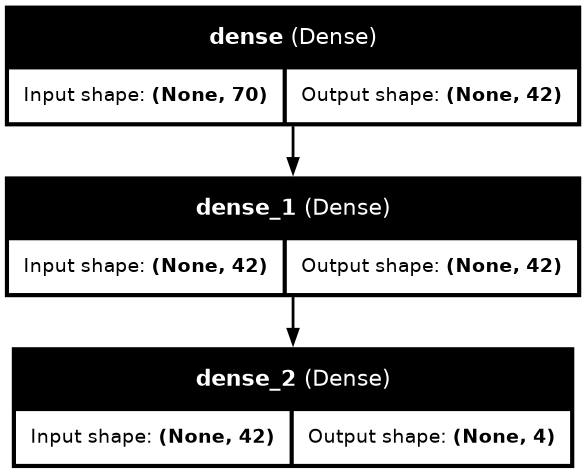

In [30]:
from keras.utils import plot_model
plot_model(classifier, to_file='classifier_plot.png', show_shapes=True, show_layer_names=True, dpi=100)

In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro') 
f1

0.9971418937300541

In [32]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


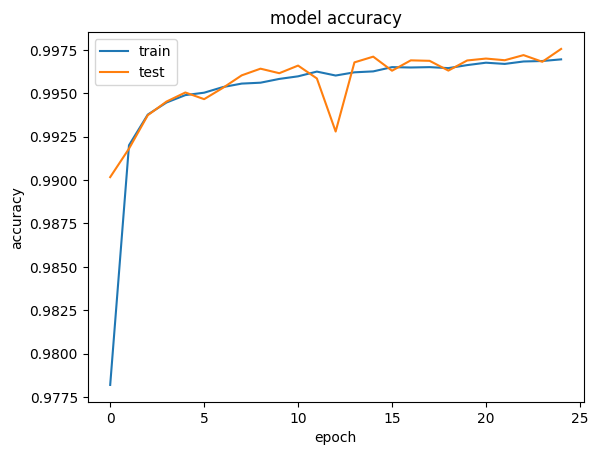

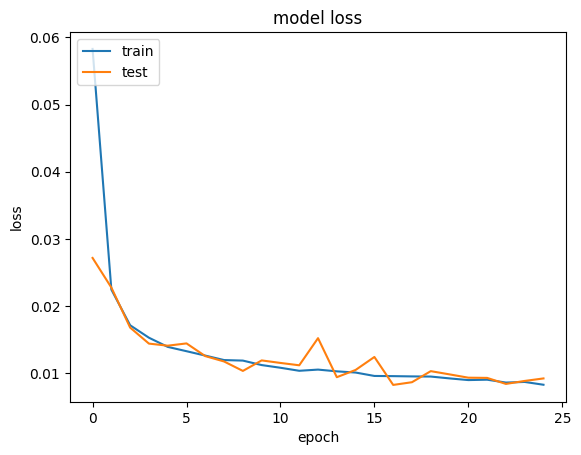

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
cvscores = []
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

compile_metrics: 99.78%
99.78% (+/- 0.00%)


In [35]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test, y_pred, average='macro') 
precision_score

0.9983415885916277

In [36]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test, y_pred, average='macro') 
recall_score

0.9959469996814481

In [37]:
# Converting the label column to an array
df2 = df[' Label']
feat = df2.values
label = df2.unique()
label

array(['BENIGN', 'DDoS', 'PortScan', 'DoS'], dtype=object)

In [38]:
# Function to plot confusion matrix for multi-class label
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(9,7))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[188358     20    300     11]
 [    18  38503      1      0]
 [   537      0  57865      0]
 [    26      0     13  26918]]


<Figure size 640x480 with 0 Axes>

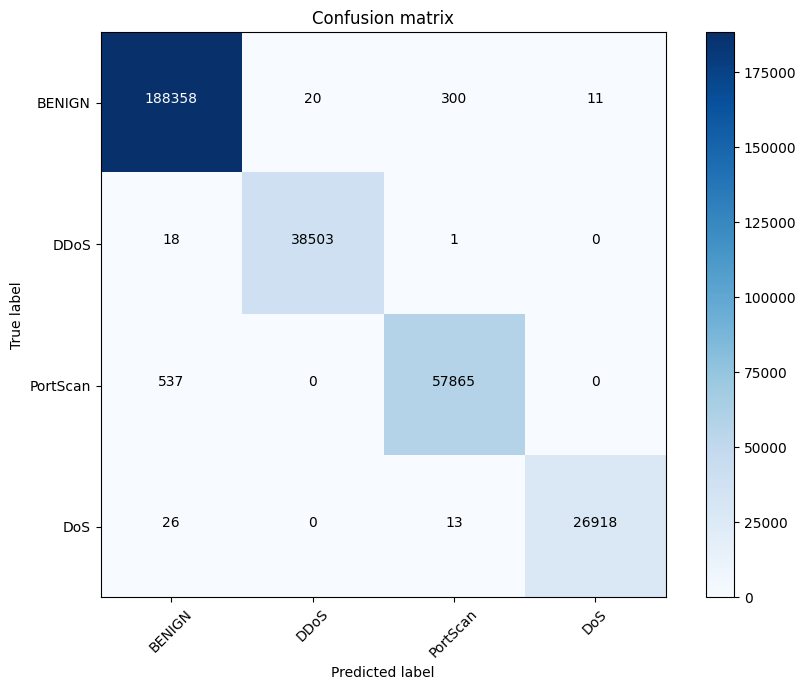

In [39]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1),labels=[0, 1, 2, 3])
                                                                                        
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix')

In [40]:
 from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    188689
           1       1.00      1.00      1.00     38522
           2       0.99      0.99      0.99     58402
           3       1.00      1.00      1.00     26957

   micro avg       1.00      1.00      1.00    312570
   macro avg       1.00      1.00      1.00    312570
weighted avg       1.00      1.00      1.00    312570
 samples avg       1.00      1.00      1.00    312570



ValueError: multilabel-indicator is not supported